<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Unzip_Planet_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install rasterio

import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 98.9 MB/s eta 0:00:00


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip show GDAL


Name: GDAL
Version: 3.6.4
Summary: GDAL: Geospatial Data Abstraction Library
Home-page: http://www.gdal.org
Author: Frank Warmerdam
Author-email: warmerdam@pobox.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [4]:
import os
from osgeo import gdal

In [ ]:
import zipfile
import os
import shutil

In [9]:
import os
import zipfile
import shutil

# Directory containing the zip files
zip_files_dir = '/content/drive/MyDrive/data/wetland_project/raw_data/planet_original/'

# Base path where you want to extract all the contents
base_extraction_path = '/content/drive/MyDrive/data/wetland_project/raw_data/planet_original/unzip/'

# Base path where you want to store .tif files
base_tif_folder_path = '/content/drive/MyDrive/data/wetland_project/preprocessed_data/planet_processing/'

# Iterate over each zip file in the directory
for zip_file in os.listdir(zip_files_dir):
    if zip_file.endswith('.zip'):
        zip_file_path = os.path.join(zip_files_dir, zip_file)

        # Extract the name and year from the zip file name
        # Assuming the format is 'Name_Year_....zip' and we split by underscore
        name_year_parts = zip_file.split('_')[:2]  # Take the first two parts: Name and Year
        folder_name = '_'.join(name_year_parts)  # Rejoin the name and year

        # Set dynamic extraction and tif paths based on the modified folder name
        extraction_path = os.path.join(base_extraction_path, folder_name)
        tif_folder_path = os.path.join(base_tif_folder_path, folder_name)

        # Check if the extraction folder already exists
        if os.path.exists(extraction_path):
            print(f"Folder for {zip_file} already exists, skipping extraction.")
            continue

        # Create directories if they don't exist
        if not os.path.exists(tif_folder_path):
            os.makedirs(tif_folder_path)

        # Extract the zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extraction_path)
            print(f"Extracted {zip_file}")

        # Move .tif files to the tif_folder_path
        for root, dirs, files in os.walk(extraction_path):
            for file in files:
                if file.endswith('.tif'):
                    shutil.move(os.path.join(root, file), os.path.join(tif_folder_path, file))
            print(f"Moved .tif files from {zip_file}")

print("Processing complete.")


Folder for KawainuiMarsh_2019_psscene_analytic_sr_udm2.zip already exists, skipping extraction.
Folder for KawainuiMarsh_2021_psscene_analytic_sr_udm2.zip already exists, skipping extraction.
Folder for KawainuiMarsh_2022_psscene_analytic_sr_udm2.zip already exists, skipping extraction.
Folder for KawainuiMarsh_2018_psscene_analytic_sr_udm2.zip already exists, skipping extraction.
Folder for KawainuiMarsh_2020_psscene_analytic_sr_udm2.zip already exists, skipping extraction.
Folder for Kahuku_2019_psscene_analytic_sr_udm2.zip already exists, skipping extraction.
Folder for Kahuku_2020_psscene_analytic_sr_udm2.zip already exists, skipping extraction.
Folder for Kahuku_2021_psscene_analytic_sr_udm2.zip already exists, skipping extraction.
Folder for Haleiwa_2018_psscene_analytic_sr_udm2.zip already exists, skipping extraction.
Folder for Kahuku_2022_psscene_analytic_sr_udm2.zip already exists, skipping extraction.
Folder for Haleiwa_2019_psscene_analytic_sr_udm2.zip already exists, skipp

In [15]:

# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/data/wetland_project/raw_data/planet_original/Wailua_opaekaa_2020_psscene_analytic_sr_udm2.zip'

# Path where you want to extract all the contents
extraction_path = '/content/drive/MyDrive/data/wetland_project/raw_data/planet_original/unzip/Wailua_opaekaa_2020'

# Path where you want to store .tif files
tif_folder_path = '/content/drive/MyDrive/data/wetland_project/preprocessed_data/planet_processing/Wailua_opaekaa_2020'

# Create directories if they don't exist
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

if not os.path.exists(tif_folder_path):
    os.makedirs(tif_folder_path)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Move .tif files to the tif_folder_path
for root, dirs, files in os.walk(extraction_path):
    for file in files:
        if file.endswith('.tif'):
            shutil.move(os.path.join(root, file), os.path.join(tif_folder_path, file))


In [ ]:
# I have to update Oahu and Maui from WGS84 to NAD83 because most of the other tiels are NAD83 and I don't have the time to re-export the others (theres more nad83 than wgs84)

# # Define input and output CRS
# input_crs = 'EPSG:32604'  # WGS 84 / UTM zone 4N
# output_crs = 'EPSG:26904'  # NAD83 / UTM zone 4N

# Directory containing the TIFF files
input_dir = '/content/drive/MyDrive/NAIP/Maui_tif'
output_dir = '/content/drive/MyDrive/NAIP/tiles/NAD83/Maui'

# Loop through all TIFF files in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".tif"):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Open the source dataset
        ds = gdal.Open(input_path)
        if ds is None:
            print(f"Failed to open {input_path}")
            continue

        # Define target SRS to NAD83
        target_srs = 'EPSG:26904'

        # Reproject
        ds_nad83 = gdal.Warp(output_path, ds, dstSRS=target_srs)

        # Close datasets
        ds_nad83 = None
        ds = None
        print(f"Reprojected {filename} to {target_srs}")

print("Reprojection complete.")

In [ ]:
# check the projection
# Path to your TIFF file (adjust as needed)
file_path = '/content/drive/MyDrive/data/ccap/oahu/5709_2379.tif'

# Open the dataset
dataset = gdal.Open(file_path)

# Check if the dataset was successfully opened
if not dataset:
    print("Unable to open file")
else:
    # Get projection information
    projection = dataset.GetProjection()
    print("Projection Info:\n", projection)

    # Close the dataset
    dataset = None


Projection Info:
 PROJCS["NAD83 / UTM zone 4N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-159],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26904"]]


Rename the tif files based on their spatial extent.
  

In [ ]:
# rename the files based on their spatial extent


# Directory containing the TIFF files
input_dir = '/content/drive/MyDrive/NAIP/tiles/NAD83/Oahu'

# Loop through all TIFF files in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".tif"):
        file_path = os.path.join(input_dir, filename)

        # Open the dataset
        ds = gdal.Open(file_path)
        if ds is None:
            print(f"Failed to open {file_path}")
            continue

        # Get geotransform and compute lower left coordinates
        gt = ds.GetGeoTransform()
        x_min = gt[0]
        y_min = gt[3] + (gt[5] * ds.RasterYSize)

        # Format new name using first 4 numbers of lower left coordinates
        new_name = f"{str(x_min)[:4]}_{str(y_min)[:4]}.tif"
        new_path = os.path.join(input_dir, new_name)

        # Rename the file
        os.rename(file_path, new_path)
        print(f"Renamed {filename} to {new_name}")

print("Renaming complete.")

In [ ]:
!pip install pandas


script for visual inspection of mismatched TIF names

In [ ]:
import matplotlib.pyplot as plt

# Function to display a TIFF file
def display_tiff(path):
    ds = gdal.Open(path)
    if ds is None:
        print(f"Failed to open {path}")
        return
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    plt.imshow(arr, cmap='BrBG')
    plt.title(os.path.basename(path))
    plt.colorbar()
    plt.show()

# Directories containing the TIFF files
general_tif_dir = '/content/drive/MyDrive/NAIP/tiles/NAD83/Oahu'
land_cover_tif_dir = '/content/drive/MyDrive/data/ccap/oahu'

# List filenames in each directory
general_tif_files = [f for f in os.listdir(general_tif_dir) if f.endswith('.tif')]
land_cover_tif_files = [f for f in os.listdir(land_cover_tif_dir) if f.endswith('.tif')]

# Compare and display mismatched files
for general_tif in general_tif_files:
    if general_tif not in land_cover_tif_files:
        print(f"Mismatch found: {general_tif}")
        general_path = os.path.join(general_tif_dir, general_tif)
        land_cover_path = os.path.join(land_cover_tif_dir, general_tif)  # Assuming the same name exists
        print("General TIF:")
        display_tiff(general_path)
        print("Land Cover TIF:")
        display_tiff(land_cover_path)


In [ ]:

# Directories containing the TIFF files
general_tif_dir = '/content/drive/MyDrive/NAIP/tiles/NAD83/Oahu'
land_cover_tif_dir = '/content/drive/MyDrive/data/ccap/oahu'

# List filenames in each directory
general_tif_files = sorted([f for f in os.listdir(general_tif_dir) if f.endswith('.tif')])
land_cover_tif_files = sorted([f for f in os.listdir(land_cover_tif_dir) if f.endswith('.tif')])

# Create DataFrames
df_general = pd.DataFrame({'General_TIF': general_tif_files})
df_land_cover = pd.DataFrame({'Land_Cover_TIF': land_cover_tif_files})

# Merge DataFrames on filenames
df_merged = pd.merge(df_general, df_land_cover, left_on='General_TIF', right_on='Land_Cover_TIF', how='outer')

# Add a column to show if names match
df_merged['Names_Match'] = df_merged['General_TIF'] == df_merged['Land_Cover_TIF']

# Display the DataFrame
print(df_merged)


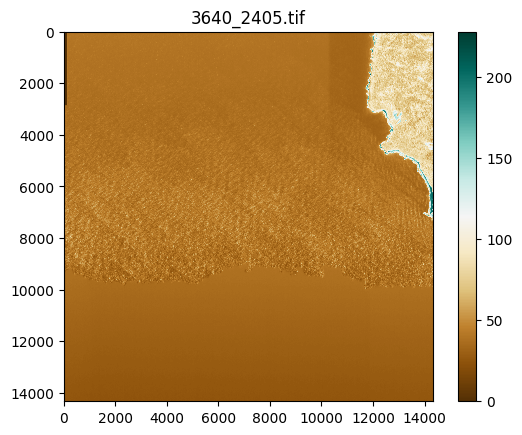

In [ ]:
display_tiff('/content/drive/MyDrive/NAIP/tiles/NAD83/niihau/3640_2405.tif')

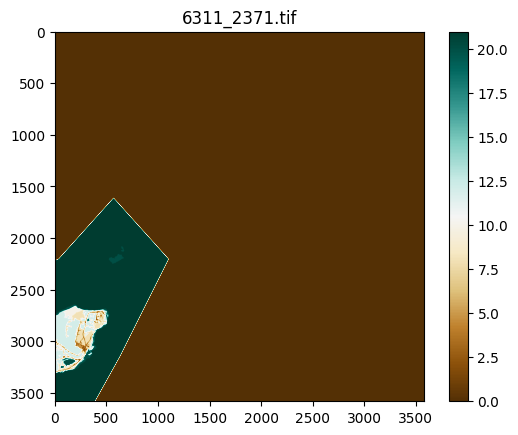

In [ ]:
display_tiff('/content/drive/MyDrive/data/ccap/oahu/6311_2371.tif')